# 50 mV Pump, 20 mV Probe

In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 1 mili

# 3 time separation

In [96]:
1/(5.35e-3*2)

93.45794392523365

In [97]:
5.35e-3

0.00535

In [98]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [99]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [100]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [101]:
samp_freq = int(sol[751000])

In [102]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [103]:
sam = int(samp_freq * 5.35e-3) 

In [104]:
samp_freq

125760000

In [105]:
125760000

125760000

In [106]:
sam

672816

In [107]:
AWG_Settings_1mili= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':125760000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1mili'
}

In [108]:
M8190A = VisaR(AWG_Settings_1mili,60000)

KeyboardInterrupt: 

In [ ]:
Initialization(M8190A,AWG_Settings_1mili)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
Pump_1mili = {
    'Name':'Pump_1mili',
    'Amplitude': 50,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
ProbeA_1mili = {
    'Name':'ProbeA_1mili',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [ ]:
ProbeB_1mili = {
    'Name':'ProbeB_1mili',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
PulseScheme_A_1mili =  {
    'Name' : 'PulseScheme_A_1mili',
    'Pulse Scheme': [Pump_1mili,ProbeA_1mili],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1mili'
}

In [ ]:
PulseScheme_B_1mili =  {
    'Name' : 'PulseScheme_B_1mili',
    'Pulse Scheme': [ProbeB_1mili,ProbeB_1mili],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1mili'
}

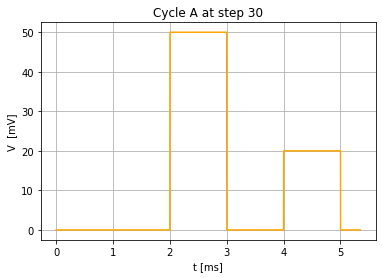

In [ ]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1mili,30,step,5.35,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1mili.jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_1mili = Sweeping_Single_List_File_teil(PulseScheme_A_1mili,30,5.35,sam,0,30,AWG_Settings_1mili,'A')[0]

In [ ]:
sweeping_run_b_1mili = Sweeping_Single_List_File_teil(PulseScheme_B_1mili,30,5.35,sam,0,30,AWG_Settings_1mili,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1mili, k)


with open(r"{dict}\cycleB_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_B_1mili['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1mili, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as j:
    sweeping_runa_100micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_1mili_125760000GHz.p".format(dict = PulseScheme_A_1mili['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [ ]:
sweeping_run_a_1mili['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_1mili['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
Sequence_File(M8190A,sweeping_runa_100micro['Pulse File Location, at step 30'],sweeping_runb_100micro['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1mili,sweeping_run_b_1mili,PulseScheme_A_1mili['Measurement file Path'],Lock_In_Settings,1)

Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 0 is 2.7373247179799987 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 1 is 2.772382636970022 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 2 is 2.819014840230653 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 3 is 2.868739685437294 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 4 is 2.897289900469133 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and t

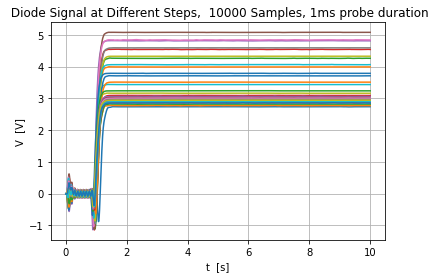

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ms probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5 35ms scheme, probe duration 1 mili,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-2,2,31)

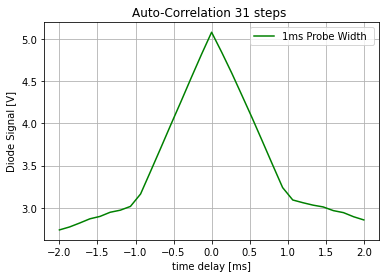

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1ms Probe Width ',color='blue')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ms]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5 35ms length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 100micro

In [4]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005

In [5]:
cycle_time # 0.005556

0.005

In [6]:
cycle_time_micro = cycle_time*1e6 #micro

In [7]:
cycle_time_micro

5000.0

In [9]:
5000/625 #loop

8.0

In [ ]:
cycle_time_micro/111111

0.05000005000005

In [ ]:
5556*1e-6

0.005556

In [ ]:
1/(0.005556*2)

89.99280057595392

In [ ]:
5556/926#loop

6.0

In [12]:
sol2_100micro = Gran_find(3071999990,3072000010,6.25e-6)
np.where(sol2_100micro != 0)

(array([10], dtype=int64),)

In [ ]:
sol[10]

3072000000.0

In [ ]:
3072000000*6.25e-6

In [3]:
np.lcm(3072000000, 48)

3072000000

In [ ]:
np.lcm(5556, 6)

5556

In [6]:
np.gcd(3072000000, 48)

48

In [ ]:
np.gcd(5556, 6)

6

In [5]:
def Granularity(samples):
    """ This function takes the number of samples and converts it to the closest number that satisfies the granularity
        of 48  
    """
    
    x = int((samples /48)+1)* 48
    
    return x

In [6]:
Granularity(625000)

625008

In [2]:
test = int((625000 /48)+1)* 48

In [4]:
625008/48

13021.0

In [3]:
test

625008

In [ ]:
filter()

In [ ]:
divisible  

In [13]:
125e6 * 5e-3

625000.0

In [ ]:
125e6 * 5e-3

625000.0

In [ ]:
for i in range(1,min(num1,num2)+1):
  if num1%i == num2%i == 0:
    divisor = i
    print(divisor)

In [11]:
sol_100micro = Gran_find(3060000000,3080000000,9.26e-6)
np.where(sol_100micro != 0)

(array([], dtype=int64),)

In [16]:
sol_100micro[10]

3072000000.0

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [2]:
625000/48

13020.833333333334

In [4]:
625024/64

9766.0

In [6]:
625024 % 64 == 0

True

In [5]:
625024/48

13021.333333333334

In [3]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 48 are : 
1
2
3
4
6
8
12
16
24
48


In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
625024/64

9766.0

In [ ]:
3072000000

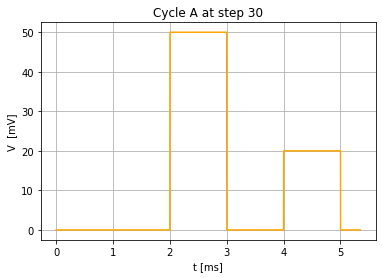

In [ ]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100micro,30,step,5.35,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1mili.jpeg'.format(loc = PulseScheme_A_1mili['Measurement file Path']),bbox_inches='tight')

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
5e-3

0.005

In [ ]:
48*20

960

In [ ]:
4704/5.35e-3

879252.3364485982

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-6)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005

In [69]:
6.25*800

5000.0

In [ ]:
cycle_time # 0.005556

0.005

In [10]:
sol2_100micro = Gran_find(3071999990,3072000010,6.25e-6)
np.where(sol2_100micro != 0)

(array([10], dtype=int64),)

In [70]:
sol2_100micro[10]

NameError: name 'sol2_100micro' is not defined

# weird

In [71]:
sam = int(3072000000*6.25e-6)

In [72]:
sam

19200

In [65]:
sam/48

400.0

This one

In [14]:
sam = int(3072000000*625e-6)

In [15]:
sam

1920000

In [16]:
sam/48

40000.0

In [2]:
AWG_Settings_100micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\100micro'
}

In [3]:
M8190A = VisaR(AWG_Settings_100micro,60000)

In [4]:
Initialization(M8190A,AWG_Settings_100micro)

Instruments Sampling Frecuency set to 3.07200000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [5]:
Pump_100micro = {
    'Name':'Pump_100micro',
    'Amplitude': 50,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_100micro = {
    'Name':'ProbeA_100micro',
    'Amplitude':20,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [7]:
ProbeB_100micro= {
    'Name':'ProbeB_100micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [11]:
PulseScheme_A_100micro =  {
    'Name' : 'PulseScheme_A_100micro',
    'Pulse Scheme': [Pump_100micro,ProbeA_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100micro'
}

In [12]:
PulseScheme_B_100micro =  {
    'Name' : 'PulseScheme_B_100micro',
    'Pulse Scheme': [ProbeB_100micro,ProbeB_100micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100micro'
}

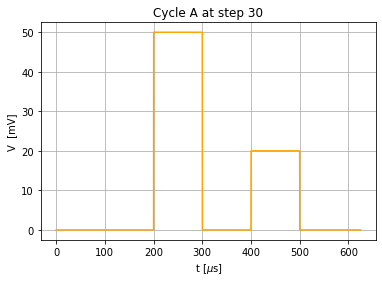

In [17]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100micro,30,step,625,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1mili.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path']),bbox_inches='tight')

In [18]:
sweeping_run_a_100micro = Sweeping_Single_List_File_teil(PulseScheme_A_100micro,30,625,sam,0,30,AWG_Settings_100micro,'A')[0]

In [19]:
sweeping_run_b_100micro = Sweeping_Single_List_File_teil(PulseScheme_B_100micro,30,625,sam,0,30,AWG_Settings_100micro,'B')[0]

In [21]:
Sequence_File(M8190A,sweeping_run_a_100micro['Pulse File Location, at step 30'],sweeping_run_b_100micro['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [22]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_100Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100micro, k)


with open(r"{dict}\cycleB_31steps_100Hz_10micro_.p".format(dict = PulseScheme_B_100micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as j:
    sweeping_runa_100microicro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_100micro['Measurement file Path']), "rb") as f:
    sweeping_runb_100micro= pickle.load(f)

In [ ]:
sweeping_run_a_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_100micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [20]:
Sequence_File(M8190A,sweeping_runa_100micro['Pulse File Location, at step 30'],sweeping_runb_100micro['Pulse File Location, at step 30'],8)

NameError: name 'sweeping_runa_100micro' is not defined

In [23]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [25]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [26]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100micro,sweeping_run_b_100micro,PulseScheme_A_100micro['Measurement file Path'],Lock_In_Settings,8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND
Average Value for measurement at step 0 is 2.131233504155803 V
Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND
Average Value for measurement at step 1 is 2.131527239500792 V
Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND
Average Value for measurement at step 2 is 2.1318893345582066 V
Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND
Average Value for measurement at step 3 is 2.1311867094688433 V
Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND
Average Value for measurement at step 4 is 2.1320128988515243 V
Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,

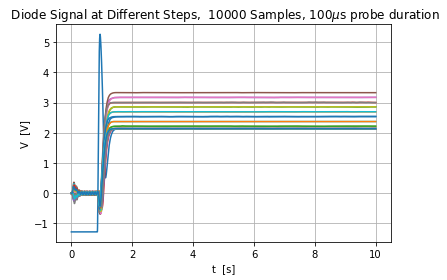

In [27]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 100 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [28]:
time_delay = np.linspace(-200,200,31)

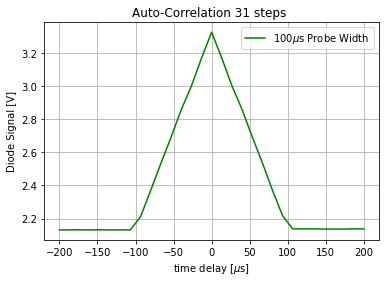

In [29]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_100micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
5e-3

0.005

In [ ]:
48*20

960

In [ ]:
4704/5.35e-3

879252.3364485982

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

# 10 micro

In [25]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000 are : 
1
2
4
5
8
10
20
25
40
50
100
125
200
250
500
625
1000
1250
2500
5000


In [14]:
loop_micro = 5000/100

In [15]:
loop_micro

50.0

In [14]:
5000/62.5

80.0

In [5]:
62.5 * 80

5000.0

In [17]:
sam = int(3072000000*100e-6)

In [29]:
modulation = 90 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time #seconds

0.005555555555555556

In [30]:
cycle_micro = cycle_time *1e6

In [32]:
cycle_micro

5555.555555555556

interval = (cycle_micro) /75

interval

interval*75

samples = int(3072000010 * (interval *1e-6))

samples

samples/48

sam = Granularity(samples)

sam

In [28]:
sam/48

6400.0

In [ ]:
0.0000625

In [11]:
6.25e-6

6.25e-06

In [7]:
AWG_Settings_10micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10micro'
}

In [8]:
M8190A = VisaR(AWG_Settings_10micro,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_10micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [9]:
Pump_10micro = {
    'Name':'Pump_10micro',
    'Amplitude': 50,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_10micro = {
    'Name':'ProbeA_10micro',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_10micro= {
    'Name':'ProbeB_10micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [12]:
PulseScheme_A_10micro =  {
    'Name' : 'PulseScheme_A_10micro',
    'Pulse Scheme': [Pump_10micro,ProbeA_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [13]:
PulseScheme_B_10micro =  {
    'Name' : 'PulseScheme_B_10micro',
    'Pulse Scheme': [ProbeB_10micro,ProbeB_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [ ]:
93

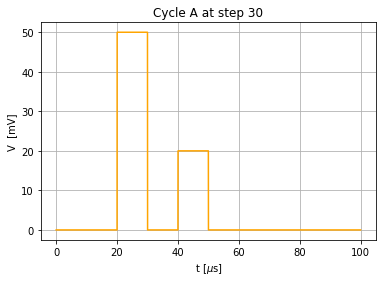

In [26]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_10micro,30,step,100,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path']),bbox_inches='tight')

In [18]:
sweeping_run_a_10micro = Sweeping_Single_List_File_teil(PulseScheme_A_10micro,30,100,sam,0,30,AWG_Settings_10micro,'A')[0]

In [19]:
sweeping_run_b_10micro = Sweeping_Single_List_File_teil(PulseScheme_B_10micro,30,100,sam,0,30,AWG_Settings_10micro,'B')[0]

In [20]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_100Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10micro, k)


with open(r"{dict}\cycleB_31steps_100Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_B_10micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_100Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as j:
    sweeping_runa_10micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_100Hz_10micro_3072000000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as f:
    sweeping_runb_10micro= pickle.load(f)

In [ ]:
sweeping_run_a_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [40]:
loop_micro

50.0

In [23]:
Sequence_File(M8190A,sweeping_run_a_10micro['Pulse File Location, at step 30'],sweeping_run_b_10micro['Pulse File Location, at step 30'],50)

Sequence loaded with the following segment data "1,50,0,1,0,307199,2,50,0,1,0,307199" and the advancement method is COND


0

In [24]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [25]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [27]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10micro,sweeping_run_b_10micro,PulseScheme_A_10micro['Measurement file Path'],Lock_In_Settings,50)

Sequence loaded with the following segment data "1,50,0,1,0,307199,2,50,0,1,0,307199" and the advancement method is COND
Average Value for measurement at step 0 is 1.3385988089012186 V
Sequence loaded with the following segment data "1,50,0,1,0,307199,2,50,0,1,0,307199" and the advancement method is COND
Average Value for measurement at step 1 is 1.3375098944069852 V
Sequence loaded with the following segment data "1,50,0,1,0,307199,2,50,0,1,0,307199" and the advancement method is COND
Average Value for measurement at step 2 is 1.3365001455017635 V
Sequence loaded with the following segment data "1,50,0,1,0,307199,2,50,0,1,0,307199" and the advancement method is COND
Average Value for measurement at step 3 is 1.3342722801096638 V
Sequence loaded with the following segment data "1,50,0,1,0,307199,2,50,0,1,0,307199" and the advancement method is COND
Average Value for measurement at step 4 is 1.3276715611921097 V
Sequence loaded with the following segment data "1,50,0,1,0,307199,2,50,0,1

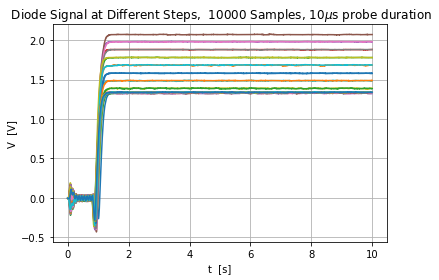

In [28]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 10 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [29]:
time_delay = np.linspace(-20,20,31)

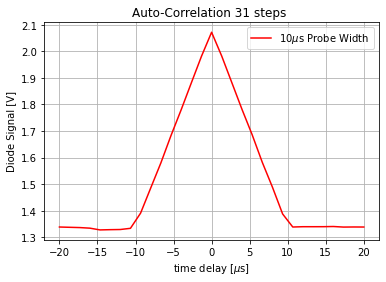

In [30]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10$\mu$s Probe Width ',color='red')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 1 micro

In [ ]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000 are : 
1
2
4
5
8
10
20
25
40
50
100
125
200
250
500
625
1000
1250
2500
5000


In [2]:
loop_1micro = 5000/50

In [3]:
loop_1micro

100.0

In [42]:
5000/50

100.0

In [4]:
sam = int(3072000000*50e-6)

In [44]:
sam/48

3200.0

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [5]:
AWG_Settings_1micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1micro'
}

In [6]:
M8190A = VisaR(AWG_Settings_1micro,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_1micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [7]:
Pump_1micro = {
    'Name':'Pump_1micro',
    'Amplitude': 50,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [8]:
ProbeA_1micro = {
    'Name':'ProbeA_1micro',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [9]:
ProbeB_1micro= {
    'Name':'ProbeB_1micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
PulseScheme_A_1micro =  {
    'Name' : 'PulseScheme_A_1micro',
    'Pulse Scheme': [Pump_1micro,ProbeA_1micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1micro'
}

In [11]:
PulseScheme_B_1micro =  {
    'Name' : 'PulseScheme_B_1micro',
    'Pulse Scheme': [ProbeB_1micro,ProbeB_1micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1micro'
}

In [ ]:
93

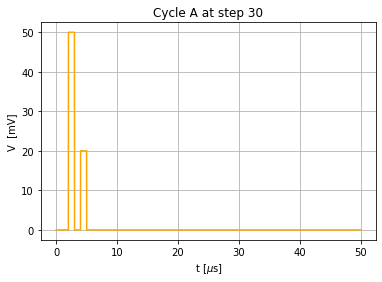

In [13]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1micro,30,step,50,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path']),bbox_inches='tight')

In [14]:
sweeping_run_a_1micro = Sweeping_Single_List_File_teil(PulseScheme_A_1micro,30,50,sam,0,30,AWG_Settings_1micro,'A')[0]

In [15]:
sweeping_run_b_1micro = Sweeping_Single_List_File_teil(PulseScheme_B_1micro,30,50,sam,0,30,AWG_Settings_1micro,'B')[0]

In [16]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_100Hz_1micro_3072000000.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1micro, k)


with open(r"{dict}\cycleB_31steps_100Hz_1micro_3072000000.p".format(dict = PulseScheme_B_1micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_100Hz_1micro_3072000000.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as j:
    sweeping_runa_1micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_100Hz_1micro_3072000000.p".format(dict = PulseScheme_A_1micro['Measurement file Path']), "rb") as f:
    sweeping_runb_1micro= pickle.load(f)

In [ ]:
sweeping_run_a_1micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_1micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [31]:
loop_micro

NameError: name 'loop_micro' is not defined

In [ ]:
Sequence_File(M8190A,sweeping_runa_1micro['Pulse File Location, at step 30'],sweeping_runb_1micro['Pulse File Location, at step 30'],50)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [32]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [33]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [34]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1micro,sweeping_run_b_1micro,PulseScheme_A_1micro['Measurement file Path'],Lock_In_Settings,100)

Sequence loaded with the following segment data "1,100,0,1,0,153599,2,100,0,1,0,153599" and the advancement method is COND
Average Value for measurement at step 0 is 0.25694708845441194 V
Sequence loaded with the following segment data "1,100,0,1,0,153599,2,100,0,1,0,153599" and the advancement method is COND
Average Value for measurement at step 1 is 0.25794593581321124 V
Sequence loaded with the following segment data "1,100,0,1,0,153599,2,100,0,1,0,153599" and the advancement method is COND
Average Value for measurement at step 2 is 0.257074082076761 V
Sequence loaded with the following segment data "1,100,0,1,0,153599,2,100,0,1,0,153599" and the advancement method is COND
Average Value for measurement at step 3 is 0.2573311701642041 V
Sequence loaded with the following segment data "1,100,0,1,0,153599,2,100,0,1,0,153599" and the advancement method is COND
Average Value for measurement at step 4 is 0.25777961786231063 V
Sequence loaded with the following segment data "1,100,0,1,0,15

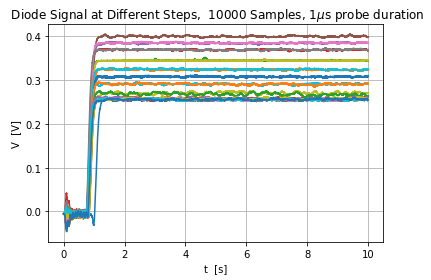

In [35]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 1 micro,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [36]:
time_delay = np.linspace(-2,2,31)

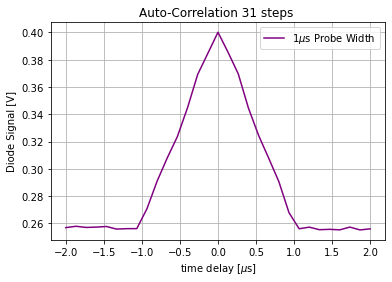

In [37]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1$\mu$s Probe Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 100nano

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

In [ ]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000000 are : 
1
2
4
5
8
10
16
20
25
32
40
50
64
80
100
125
160
200
250
320
400
500
625
800
1000
1250
1600
2000
2500
3125
4000
5000
6250
8000
10000
12500
15625
20000
25000
31250
40000
50000
62500
78125
100000
125000
156250
200000
250000
312500
500000
625000
1000000
1250000
2500000
5000000


In [2]:
loop_100nano = 5000000/625

In [3]:
loop_100nano

8000.0

In [16]:
625*loop_100nano

5000000.0

In [ ]:
5000/50

100.0

In [4]:
sam = int(3072000000*625e-9)

In [5]:
sam

1920

In [ ]:
sam/48

40.0

In [6]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005

In [7]:
AWG_Settings_100nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\100nano'
}

In [8]:
M8190A = VisaR(AWG_Settings_100nano,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_100nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [9]:
Pump_100nano = {
    'Name':'Pump_100nano',
    'Amplitude': 50,
    'Start time':200,
    'End time':2e-10,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_100nano = {
    'Name':'ProbeA_100nano',
    'Amplitude':20,
    'Start time':0,
    'End time':400,
    'Start Duration':100,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_100nano= {
    'Name':'ProbeB_100nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [12]:
PulseScheme_A_100nano =  {
    'Name' : 'PulseScheme_A_100nano',
    'Pulse Scheme': [Pump_100nano,ProbeA_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100nano'
}

In [13]:
PulseScheme_B_100nano =  {
    'Name' : 'PulseScheme_B_100nano',
    'Pulse Scheme': [ProbeB_100nano,ProbeB_100nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\100nano'
}

In [ ]:
93

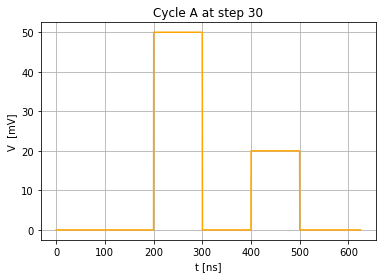

In [15]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_100nano,30,step,625,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path']),bbox_inches='tight')

In [ ]:
sam = int(3072000000*625e-9)

In [ ]:
sam

1920

In [17]:
sweeping_run_a_100nano = Sweeping_Single_List_File_teil(PulseScheme_A_100nano,30,625,sam,0,30,AWG_Settings_100nano,'A')[0]

In [18]:
sweeping_run_b_100nano = Sweeping_Single_List_File_teil(PulseScheme_B_100nano,30,625,sam,0,30,AWG_Settings_100nano,'B')[0]

In [19]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_100nano, k)


with open(r"{dict}\cycleB_31steps_93Hz_100nano_.p".format(dict = PulseScheme_B_100nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_100nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as j:
    sweeping_runa_100nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_100nano_.p".format(dict = PulseScheme_A_100nano['Measurement file Path']), "rb") as f:
    sweeping_runb_100nano= pickle.load(f)

In [ ]:
sweeping_run_a_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_100nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [86]:
loop_100nano

8000.0

In [ ]:
Sequence_File(M8190A,sweeping_runa_100nano['Pulse File Location, at step 30'],sweeping_runb_100nano['Pulse File Location, at step 30'],8000)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [28]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [21]:
loop_100nano

8000.0

In [22]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [24]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_100nano,sweeping_run_b_100nano,PulseScheme_A_100nano['Measurement file Path'],Lock_In_Settings,8000)

Sequence loaded with the following segment data "1,8000,0,1,0,1919,2,8000,0,1,0,1919" and the advancement method is COND
Average Value for measurement at step 0 is 1.782208201182737 V
Sequence loaded with the following segment data "1,8000,0,1,0,1919,2,8000,0,1,0,1919" and the advancement method is COND
Average Value for measurement at step 1 is 1.7827597767483006 V
Sequence loaded with the following segment data "1,8000,0,1,0,1919,2,8000,0,1,0,1919" and the advancement method is COND
Average Value for measurement at step 2 is 1.7831827609740862 V
Sequence loaded with the following segment data "1,8000,0,1,0,1919,2,8000,0,1,0,1919" and the advancement method is COND
Average Value for measurement at step 3 is 1.7866529887911033 V
Sequence loaded with the following segment data "1,8000,0,1,0,1919,2,8000,0,1,0,1919" and the advancement method is COND
Average Value for measurement at step 4 is 1.7912163604902427 V
Sequence loaded with the following segment data "1,8000,0,1,0,1919,2,8000,0,

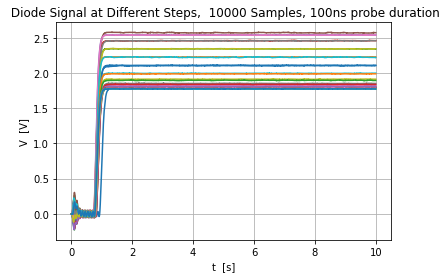

In [25]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 100ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 100 nano,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [26]:
time_delay = np.linspace(-200,200,31)

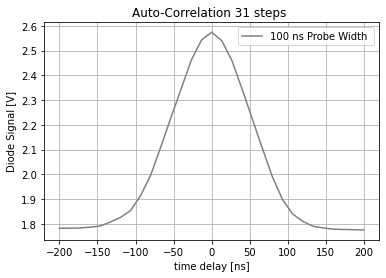

In [27]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'100 ns Probe Width ',color='grey')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_100nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 10 Nano

In [88]:
loop_10nano = 5000000/100

In [89]:
loop_10nano

50000.0

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

In [87]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000000 are : 
1
2
4
5
8
10
16
20
25
32
40
50
64
80
100
125
160
200
250
320
400
500
625
800
1000
1250
1600
2000
2500
3125
4000
5000
6250
8000
10000
12500
15625
20000
25000
31250
40000
50000
62500
78125
100000
125000
156250
200000
250000
312500
500000
625000
1000000
1250000
2500000
5000000


In [106]:
loop_10nano = 5000000/1000

In [107]:
loop_10nano

5000.0

In [ ]:
5000/50

100.0

In [103]:
sam = int(3072000000*1000e-9)

In [104]:
sam

3072

In [105]:
sam/48

64.0

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
AWG_Settings_10nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10nano'
}

In [ ]:
M8190A = VisaR(AWG_Settings_10nano,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_10nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [108]:
Pump_10nano = {
    'Name':'Pump_10nano',
    'Amplitude': 50,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [109]:
ProbeA_10nano = {
    'Name':'ProbeA_10nano',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [110]:
ProbeB_10nano= {
    'Name':'ProbeB_10nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [111]:
PulseScheme_A_10nano =  {
    'Name' : 'PulseScheme_A_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeA_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [112]:
PulseScheme_B_10nano =  {
    'Name' : 'PulseScheme_B_10nano',
    'Pulse Scheme': [ProbeB_10nano,ProbeB_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10nano'
}

In [ ]:
93

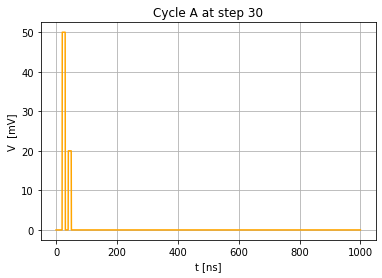

In [113]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_10nano,30,step,1000,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_10nano = Sweeping_Single_List_File_teil(PulseScheme_A_10nano,30,1000,sam,0,30,AWG_Settings_10nano,'A')[0]

In [ ]:
sweeping_run_b_10nano = Sweeping_Single_List_File_teil(PulseScheme_B_10nano,30,1000,sam,0,30,AWG_Settings_10nano,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10nano, k)


with open(r"{dict}\cycleB_31steps_93Hz_10nano_.p".format(dict = PulseScheme_B_10nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as j:
    sweeping_runa_10nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as f:
    sweeping_runb_10nano= pickle.load(f)

In [ ]:
sweeping_run_a_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [114]:
loop_10nano

5000.0

In [ ]:
Sequence_File(M8190A,sweeping_runa_10nano['Pulse File Location, at step 30'],sweeping_runb_10nano['Pulse File Location, at step 30'],5000)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10nano,sweeping_run_b_10nano,PulseScheme_A_10nano['Measurement file Path'],Lock_In_Settings,5000)

Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 0 is -0.005428930947626763 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 1 is 2.3446478335686955 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 2 is 2.5550973792204332 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 3 is 2.7866360582131264 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND


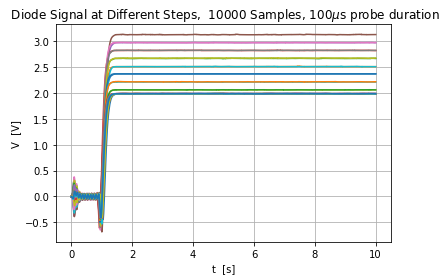

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 10 nano,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-20,20,31)

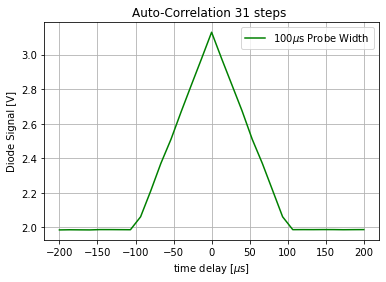

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10 ns Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# 1 nano

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

In [ ]:
def print_factors(n):
    i = 1
    while(i < n+1):
        if n % i == 0:
            print(i)
        i = i + 1

number = int(input("Enter a number : "))

print("The factors for {} are : ".format(number))
print_factors(number)

The factors for 5000000 are : 
1
2
4
5
8
10
16
20
25
32
40
50
64
80
100
125
160
200
250
320
400
500
625
800
1000
1250
1600
2000
2500
3125
4000
5000
6250
8000
10000
12500
15625
20000
25000
31250
40000
50000
62500
78125
100000
125000
156250
200000
250000
312500
500000
625000
1000000
1250000
2500000
5000000


In [118]:
loop_1nano = 5000000/5000

In [119]:
loop_1nano

1000.0

In [132]:
5000*loop_1nano

5000000.0

In [ ]:
5000/50

100.0

In [120]:
sam = int(3072000000*5000e-9)

In [121]:
sam

15360

In [122]:
sam/48

320.0

In [ ]:
modulation = 100 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
AWG_Settings_1nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3072000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\1nano'
}

In [ ]:
M8190A = VisaR(AWG_Settings_1nano,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_1nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [123]:
Pump_1nano = {
    'Name':'Pump_1nano',
    'Amplitude': 50,
    'Start time':2,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [124]:
ProbeA_1nano = {
    'Name':'ProbeA_1nano',
    'Amplitude':20,
    'Start time':0,
    'End time':4,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [125]:
ProbeB_1nano= {
    'Name':'ProbeB_1nano',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [126]:
PulseScheme_A_1nano =  {
    'Name' : 'PulseScheme_A_1nano',
    'Pulse Scheme': [Pump_1nano,ProbeA_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

In [127]:
PulseScheme_B_1nano =  {
    'Name' : 'PulseScheme_B_1nano',
    'Pulse Scheme': [ProbeB_1nano,ProbeB_1nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\1nano'
}

In [ ]:
93

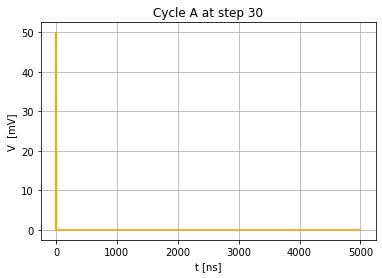

In [131]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_1nano,30,step,5000,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig(r'{loc}\Cycle A, Probe width 1micro.jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_1nano = Sweeping_Single_List_File_teil(PulseScheme_A_1nano,30,5.35,sam,0,30,AWG_Settings_1nano,'A')[0]

In [ ]:
sweeping_run_b_1nano = Sweeping_Single_List_File_teil(PulseScheme_B_1nano,30,5.35,sam,0,30,AWG_Settings_1nano,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_1nano, k)


with open(r"{dict}\cycleB_31steps_93Hz_1nano_.p".format(dict = PulseScheme_B_1nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_1nano, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as j:
    sweeping_runa_1nano = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_1nano_.p".format(dict = PulseScheme_A_1nano['Measurement file Path']), "rb") as f:
    sweeping_runb_1nano= pickle.load(f)

In [ ]:
sweeping_run_a_1nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_1nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
Sequence_File(M8190A,sweeping_runa_1nano['Pulse File Location, at step 30'],sweeping_runb_1nano['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_1nano,sweeping_run_b_1nano,PulseScheme_A_1nano['Measurement file Path'],Lock_In_Settings,l)

Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 0 is -0.005428930947626763 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 1 is 2.3446478335686955 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 2 is 2.5550973792204332 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 3 is 2.7866360582131264 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND


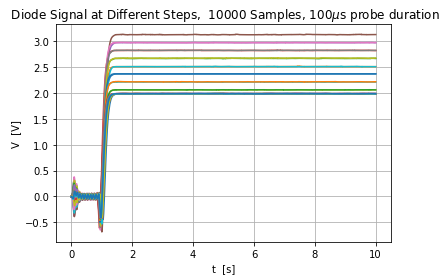

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 1 nano,31 steps, no legend, .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-2,2,31)

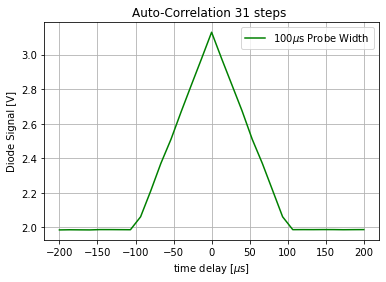

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1 ns Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes  length tc = {a}, sens {b}, {c}s DAQ .jpeg'.format(loc = PulseScheme_A_1nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))

# Vault

Frequency Range = (125e6,8e9)


In [3]:
def div(samples):
    """ 
    Checks whether a number of samples is ddivisible by the granularity of 48
    
    samples: int, number of samples to be checked
    """
    statement = samples % 48 == 0

    return statement

In [6]:
div(48)

True

Opt. func receives Modulation Freq and number of repetitions, needs to then pick the best values for number of samples and sampling frec (within the range) which gives the desire modulation

In [ ]:
def cycle_time_length(modulation):

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

In [ ]:
125000000

In [ ]:
1/0.01

100.0

In [ ]:
0.0055*2

0.011

In [ ]:
1/(5.35e-3*2)

93.45794392523365

In [ ]:
5.35e-3

0.00535

In [ ]:
modulation = 93 #Hz 
comp_time = 1/modulation
cycle_time = comp_time/2
cycle_time

0.005376344086021506

In [ ]:
sam_mili = int(126500000*5.35e-3)
sam_mili

676775

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = sol[751000]

In [ ]:
(samp_freq * 5.35e-3)/ 48

14017.0

In [ ]:
div_test(3072000000,6.25e-6)

True

In [ ]:
sol = Gran_find(3071999990,3072000010,6.25e-6)

In [ ]:
np.nonzero(sol)

(array([10], dtype=int64),)

In [ ]:
sols = np.array([div_test(i,6.25e-6) for i in samp_interval])

In [ ]:
sols

array([ True, False, False])

In [ ]:
sol = np.zeros((len(samp_interval)))

In [ ]:
samp_interval.size

3

In [ ]:
sol.size

3

In [ ]:
sol

array([3.072e+09, 0.000e+00, 0.000e+00])

In [ ]:
np.linspace(125000000,8000000000)

In [ ]:
np.arange(125000000,1000000000,1).size

875000000

In [ ]:
for i,j,k in zip(fileA, fileB,range(0,len(fileA))):

In [ ]:
def Mult_find_1GHz(time_length):
    """ goes from lowest Sr to 1GHz
    
    
    
    """
    Sampling_freq_range = np.arange(125000000,1000000000,1)
    sol = np.array((len(Sampling_freq_range)))
    for j,i in (Sampling_freq_range,range(0,len(Sampling_freq_range))):
        if ((j * time_length) % 48 == 0  ):
            sol[i] = j
        else:
            sol[i] = 0

    return sol   

In [ ]:
Mult_find_1GHz(0.005)

ValueError: too many values to unpack (expected 2)

In [ ]:
5e-3

0.005

In [ ]:
48*20

960

In [ ]:
4704/5.35e-3

879252.3364485982

In [ ]:
sol = Gran_find(125009000,126000000,5.35e-3)
np.where(sol != 0)

(array([751000], dtype=int64),)

In [ ]:
samp_freq = int(sol[751000])

In [ ]:
sam = int(samp_freq * 5.35e-3) 

In [ ]:
samp_freq

125760000

In [ ]:
125760000

In [ ]:
sam

672816

In [ ]:
AWG_Settings_10micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':125760000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\50,20\10micro'
}

In [ ]:
M8190A = VisaR(AWG_Settings_10micro,60000)

In [ ]:
Initialization(M8190A,AWG_Settings_10micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [ ]:
Pump_10micro = {
    'Name':'Pump_10micro',
    'Amplitude': 50,
    'Start time':10,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
ProbeA_10micro = {
    'Name':'ProbeA_10micro',
    'Amplitude':20,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [ ]:
ProbeB_10micro= {
    'Name':'ProbeB_10micro',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [ ]:
PulseScheme_A_10micro =  {
    'Name' : 'PulseScheme_A_10micro',
    'Pulse Scheme': [Pump_10micro,ProbeA_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [ ]:
PulseScheme_B_10micro =  {
    'Name' : 'PulseScheme_B_10micro',
    'Pulse Scheme': [ProbeB_10micro,ProbeB_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\50,20\10micro'
}

In [ ]:
93

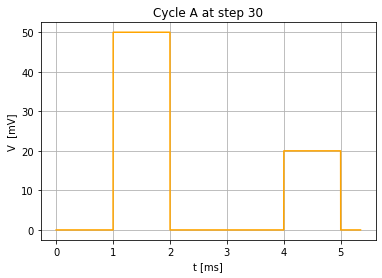

In [ ]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_10micro,30,step,5.35,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 1mili.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path']),bbox_inches='tight')

In [ ]:
sweeping_run_a_10micro = Sweeping_Single_List_File_teil(PulseScheme_A_10micro,30,5.35,sam,0,30,AWG_Settings_1mili,'A')[0]

In [ ]:
sweeping_run_b_10micro = Sweeping_Single_List_File_teil(PulseScheme_B_10micro,30,5.35,sam,0,30,AWG_Settings_1mili,'B')[0]

In [ ]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10micro, k)


with open(r"{dict}\cycleB_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_B_10micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as j:
    sweeping_runa_10microicro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_125760000GHz.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as f:
    sweeping_runb_10micro= pickle.load(f)

In [ ]:
sweeping_run_a_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
Sequence_File(M8190A,sweeping_runa_10micro['Pulse File Location, at step 30'],sweeping_runb_10micro['Pulse File Location, at step 30'],8)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '30ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '100Hz'
}

In [ ]:
playingtime = 10

Diode_Signal, averaged_data = Voltage_Autocorrelation_loop(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10micro,sweeping_run_b_10micro,PulseScheme_A_10micro['Measurement file Path'],Lock_In_Settings,1)

Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 0 is -0.005428930947626763 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 1 is 2.3446478335686955 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 2 is 2.5550973792204332 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND
Average Value for measurement at step 3 is 2.7866360582131264 V
Sequence loaded with the following segment data "1,1,0,1,0,672815,2,1,0,1,0,672815" and the advancement method is COND


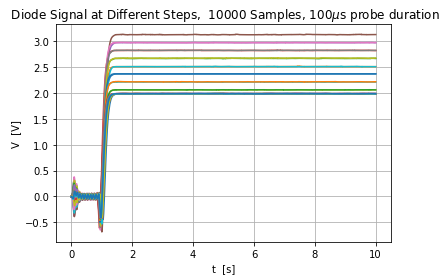

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 10$\mu$s probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 5ms scheme, probe duration 10 micro,31 steps, no legend,6Ghz .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-20,20,31)

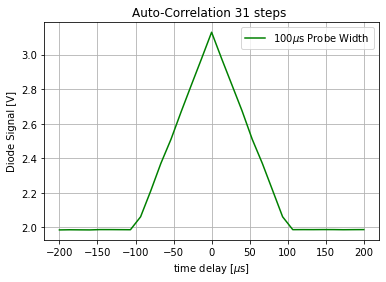

In [ ]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10$\mu$s Probe Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 5ms length tc = {a}, sens {b}, {c}s DAQ 6Ghz.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime ))